# Study Case World Happiness Corellation Analysis

## Below is the data of World Happiness in 2021

In [1]:
import numpy as ny 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import folium
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)

In [2]:
dfd = pd.read_csv('world-happiness-data-2021.csv')
dfd.rename(columns = {'Freedom to make life choices':'Freedom of life'},inplace = True)

## The highest ladder score mean in each region

In [3]:
corr_gdp_lfex = []
for i in dfd['Regional indicator'].unique():
    corr_gdp_lfex.append(dfd[dfd['Regional indicator']==i]['Ladder score'].mean())

dfd_gdp_corr0 = pd.DataFrame({ 
 'Region': dfd['Regional indicator'].unique(),   
 'Ls_Mean': corr_gdp_lfex
}).sort_values('Ls_Mean',ascending = False).reset_index(drop = True)   
dfd_gdp_corr0

,Region,Ls_Mean
0,North America and ANZ,7.128500
1,Western Europe,6.914905
2,Central and Eastern Europe,5.984765
3,Latin America and Caribbean,5.908050
4,East Asia,5.810333
5,Commonwealth of Independent States,5.467000
6,Southeast Asia,5.407556
7,Middle East and North Africa,5.219765
8,Sub-Saharan Africa,4.494472
9,South Asia,4.441857


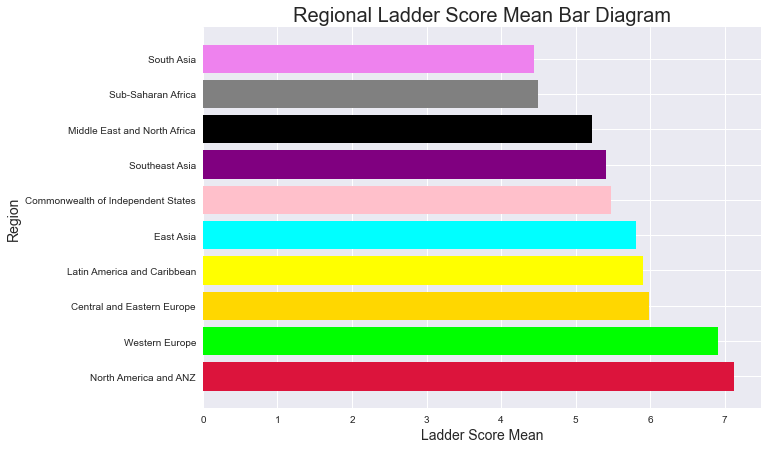

In [4]:
x = dfd_gdp_corr0['Region'].tolist()
y = dfd_gdp_corr0['Ls_Mean']

plt.figure( figsize =(10,7))
plt.barh(x,y, color = ['Crimson','Lime','Gold','Yellow','Cyan','Pink','Purple','Black','Grey','Violet'])
plt.title('Regional Ladder Score Mean Bar Diagram', size = 20)
plt.xlabel('Ladder Score Mean', size = 14)
plt.ylabel('Region', size = 14)
plt.show()

# plt.figure(figsize=(12,7))
# sbn.barplot(data = dfd_gdp_corr0, x ='Ls_Mean' , y = 'Region')
# plt.ylabel('Regional indicator', size = 20)
# plt.xlabel('Ladder Score Mean', size = 20)
# plt.title('Regional Ladder Score Mean Bar Diagram', size = 16)
# plt.show()

## Corellation Between Ladder Score Of Region And Life Expectancy

In [5]:
dfd['Ladder score'].corr(dfd['Healthy life expectancy'], method = 'pearson')

0.7680994550105206

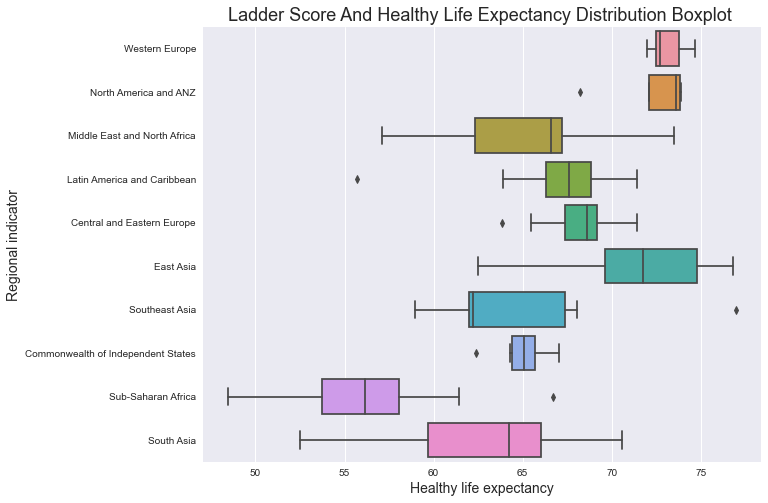

In [6]:
plt.figure(figsize=(10,8))
sbn.boxplot(x=dfd['Healthy life expectancy'], y=dfd['Regional indicator']) 
plt.title('Ladder Score And Healthy Life Expectancy Distribution Boxplot ', size = 18)
plt.ylabel('Regional indicator', size = 14)
plt.xlabel('Healthy life expectancy', size = 14)
plt.show()

On this boxplot diagram found that some of region has an outliers and a different range of outilers. But in this analysis merely focuse on the region with no outliers on the data distribution. The region with the outliers data distribusi will only taken as an comparation to amplify the analysis and so on the next boxplot diagram.

In [7]:
from scipy.stats import shapiro
shapiro(dfd['Healthy life expectancy'])

ShapiroResult(statistic=0.9552737474441528, pvalue=9.761557157617062e-05)

In [8]:
sw_statistic, sw_pvalue = shapiro(dfd['Healthy life expectancy'])

if sw_pvalue > 0.05:
     print(f'P-Value: {sw_pvalue}). Normal Distribution')
else:
     print(f'P-Value: {sw_pvalue}).Not Normal Distribution')

P-Value: 9.761557157617062e-05).Not Normal Distribution


C:\Users\HILMI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


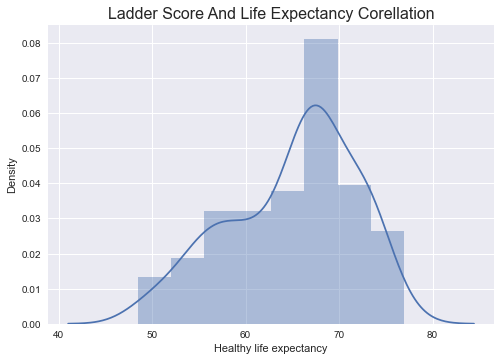

In [9]:
sbn.distplot(dfd['Healthy life expectancy'])
plt.title('Ladder Score And Life Expectancy Corellation', size = 16)
plt.show()

As the normal distribution test (saphiro will) showing the negative result, this graph showing the unnormal distribution of the data. Hence the data need a handling to overcome the unnormal distribution of the data. 

In [10]:
#LS And HLEx Corr
corr_ls_lfex = []
# corr_gdp = []
for i in dfd['Regional indicator'].unique():
    corr_ls_lfex.append(dfd[dfd['Regional indicator']==i]['Ladder score'].corr(dfd['Healthy life expectancy'],method ='pearson'))
# corr_gdp.append(dfd[dfd['Regional indicator']==i]['Logged GDP per capita'].sum())
    
dfd_gdp_corr = pd.DataFrame({ 
 'Region': dfd['Regional indicator'].unique(),   
 'Corellation':  corr_ls_lfex,
#  'GDP Per Capita' : corr_gdp
}).sort_values('Corellation',ascending = True).reset_index(drop = True)   
# dfd_gdp_corr['GDP Corellation']= dfd_gdp_corr['Corellation'].corr(dfd_gdp_corr['GDP Per Capita'])
dfd_gdp_corr

,Region,Corellation
0,Western Europe,-0.276350
1,East Asia,-0.052032
2,Sub-Saharan Africa,0.122669
3,Commonwealth of Independent States,0.243719
4,Central and Eastern Europe,0.333319
5,Middle East and North Africa,0.688484
6,South Asia,0.752666
7,Southeast Asia,0.775131
8,Latin America and Caribbean,0.813428
9,North America and ANZ,0.822817


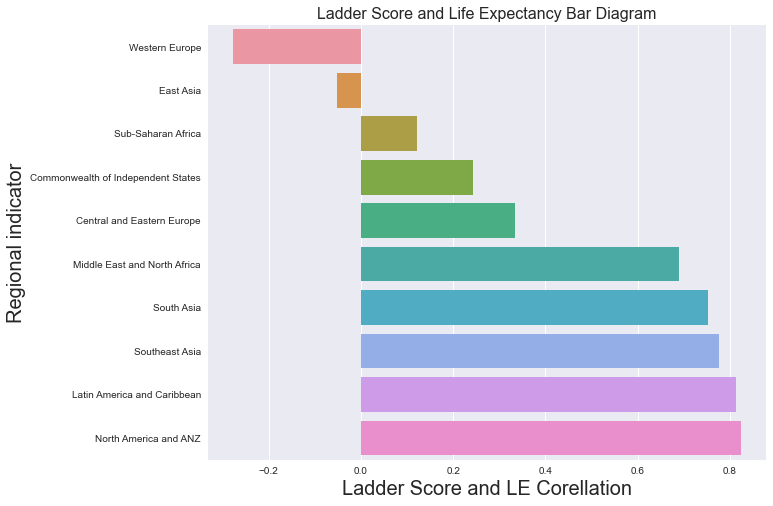

In [11]:
plt.figure(figsize=(10,8))
sbn.barplot(data = dfd_gdp_corr, y = 'Region', x = 'Corellation')
plt.ylabel('Regional indicator', size = 20)
plt.xlabel('Ladder Score and LE Corellation', size = 20)
plt.title('Ladder Score and Life Expectancy Bar Diagram', size = 16)
plt.show()

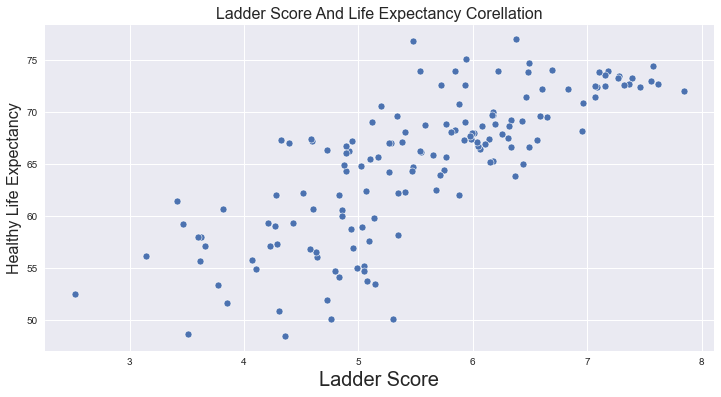

In [12]:
plt.figure( figsize =(12,6))
sbn.scatterplot(data = dfd, x = 'Ladder score', y = 'Healthy life expectancy')
plt.xlabel('Ladder Score', size = 20)
plt.ylabel('Healthy Life Expectancy', size = 16)
plt.title('Ladder Score And Life Expectancy Corellation', size = 16)
plt.show()

From all the shown graph, it signify the issues between lader score and healthy life expectancy. On western europe region it show the negative correlation value below 0 and also has a different values on the other region. Just take an example of the happiest country in western europe that is finland. What could be the issues is that the western europe has the high number of ladder score in each of their country. But how come that this region has a less value of the corellation. Indeed, corellation value isn't necessarily the result of the cause and effect. Plus, the fact that the finland which is the happiest country in western europe isn't the country with the high life expectancy. Temporarily, it conclude that ladder score doesn't affect the healthy life expectancy.  

# Corellation Ladder Score Of Region And GDP

In [13]:
dfd['Ladder score'].corr(dfd['Logged GDP per capita'], method = 'pearson')

0.7897596965098931

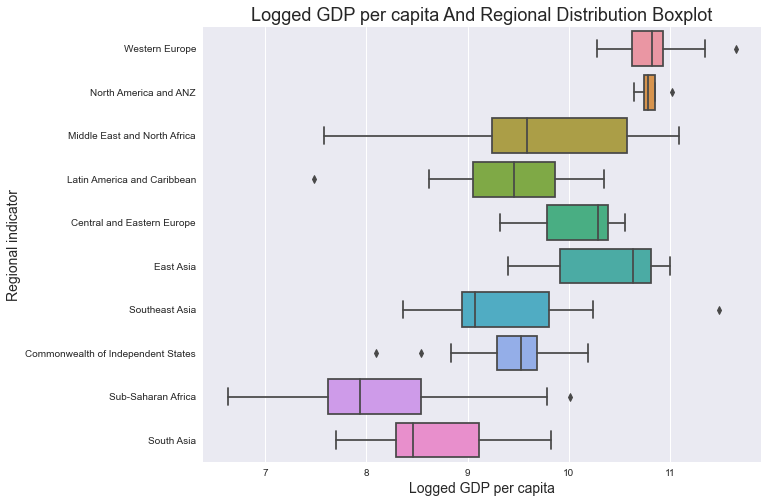

In [14]:
plt.figure(figsize=(10,8))
sbn.boxplot(x=dfd['Logged GDP per capita'], y=dfd['Regional indicator']) 
plt.title('Logged GDP per capita And Regional Distribution Boxplot', size = 18)
plt.ylabel('Regional indicator', size = 14)
plt.xlabel('Logged GDP per capita', size = 14)
plt.show()

In [15]:
from scipy.stats import shapiro
shapiro(dfd['Logged GDP per capita'])

ShapiroResult(statistic=0.9650300741195679, pvalue=0.0007689279154874384)

In [16]:
sw_statistic, sw_pvalue = shapiro(dfd['Logged GDP per capita'])

if sw_pvalue > 0.05:
    print(f'P-Value: {sw_pvalue}).Normal Distribution')
else:
     print(f'P-Value: {sw_pvalue}).Not Normal Distribution')

P-Value: 0.0007689279154874384).Not Normal Distribution


C:\Users\HILMI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


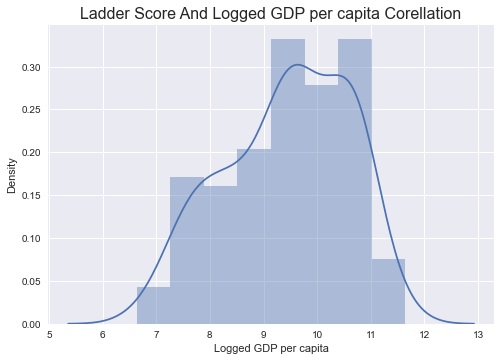

In [17]:
sbn.distplot(dfd['Logged GDP per capita'])
plt.title('Ladder Score And Logged GDP per capita Corellation', size = 16)
plt.show()

In [18]:
# LS And GDP Corr
corr_gdp_lfex = []
for i in dfd['Regional indicator'].unique():
    corr_gdp_lfex.append(dfd[dfd['Regional indicator']==i]['Ladder score'].corr(dfd['Logged GDP per capita'],method='pearson'))

dfd_gdp_corr2 = pd.DataFrame({ 
 'Region': dfd['Regional indicator'].unique(),   
'Corellation':  corr_gdp_lfex
}).sort_values('Corellation',ascending = True).reset_index(drop = True)   
dfd_gdp_corr2

,Region,Corellation
0,North America and ANZ,-0.956945
1,Commonwealth of Independent States,-0.117230
2,Sub-Saharan Africa,0.306345
3,South Asia,0.431049
4,East Asia,0.462412
5,Central and Eastern Europe,0.560664
6,Western Europe,0.679715
7,Latin America and Caribbean,0.683969
8,Southeast Asia,0.786215
9,Middle East and North Africa,0.869752


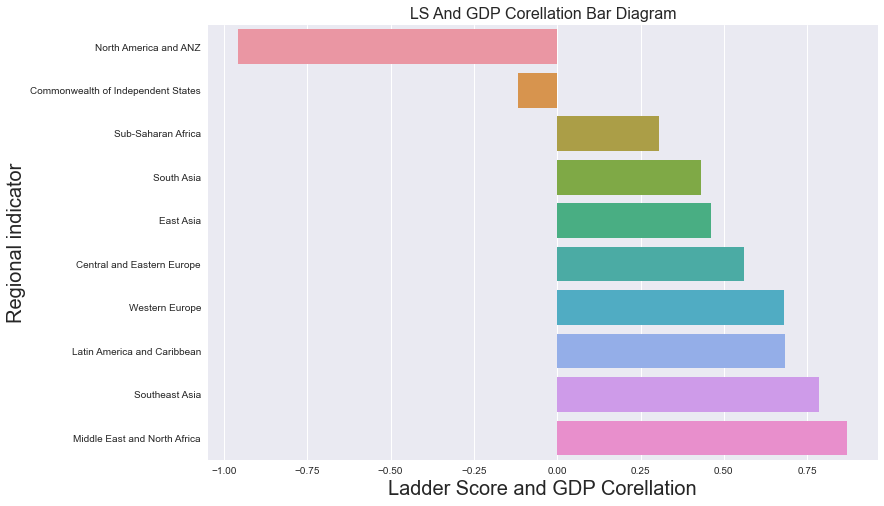

In [19]:
plt.figure(figsize=(12,8))
sbn.barplot(data = dfd_gdp_corr2, x ='Corellation' , y = 'Region')
plt.ylabel('Regional indicator', size = 20)
plt.xlabel('Ladder Score and GDP Corellation', size = 20)
plt.title('LS And GDP Corellation Bar Diagram', size = 16)
plt.show()

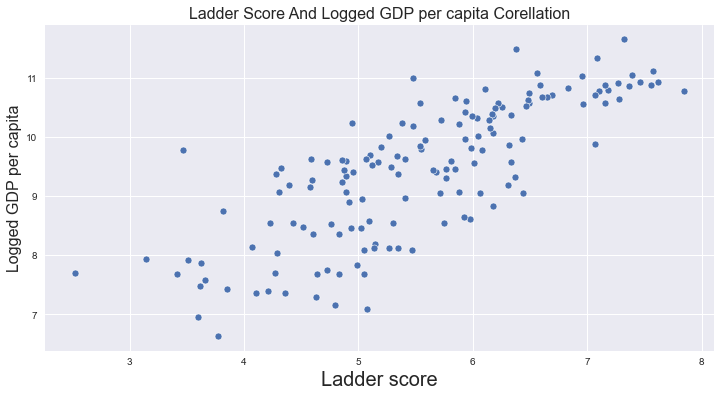

In [20]:
plt.figure( figsize =(12,6))
sbn.scatterplot(data = dfd, x = 'Ladder score', y = 'Logged GDP per capita')
plt.xlabel('Ladder score', size = 20)
plt.ylabel('Logged GDP per capita', size = 16)
plt.title('Ladder Score And Logged GDP per capita Corellation', size = 16)
plt.show()

This data shows that the Middle East and North Africa has the highest correlation score. This are align with the countries in middle east are one of the most gdp gain per capita such as Saudy Arabia, Qatar, Oman, etc. Plus, western europe also has a quite high correlation score. But, not for the North America with the highest ladder score that has a negative corellation score. In fact, prosperity of peoples in some countries are depends on the poverty number which means gdp has the affection on countries happiness to afford their people. So overall the gdp and ladder score is corellate to each other.

# Corellation Ladder Score Of Region And Social Support

In [21]:
dfd['Ladder score'].corr(dfd['Social support'], method = 'pearson')

0.7568876453634998

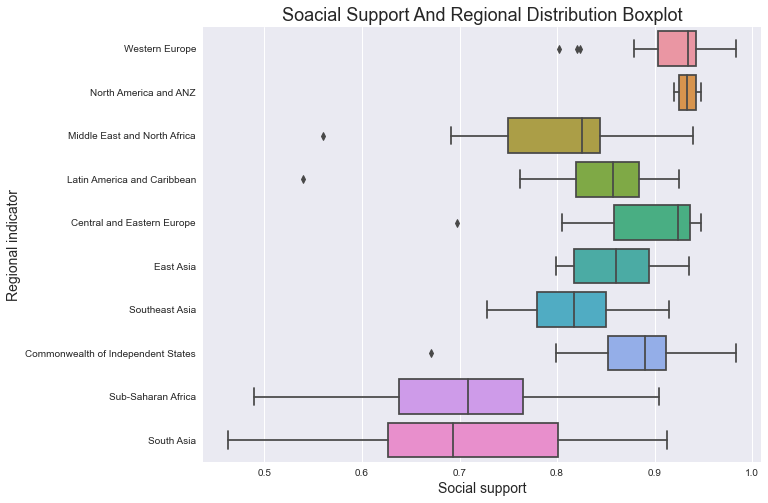

In [22]:
plt.figure(figsize=(10,8))
sbn.boxplot(x=dfd['Social support'], y=dfd['Regional indicator']) 
plt.title('Soacial Support And Regional Distribution Boxplot', size = 18)
plt.ylabel('Regional indicator', size = 14)
plt.xlabel('Social support', size = 14)
plt.show()

In [23]:
from scipy.stats import shapiro
shapiro(dfd['Social support'])

ShapiroResult(statistic=0.9245219826698303, pvalue=4.530692763182742e-07)

In [24]:
sw_statistic, sw_pvalue = shapiro(dfd['Social support'])

if sw_pvalue > 0.05:
    print(f'P-Value: {sw_pvalue}). Normal Distribution')
else:
     print(f'P-Value: {sw_pvalue}).Not Normal Distribution')

P-Value: 4.530692763182742e-07).Not Normal Distribution


C:\Users\HILMI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


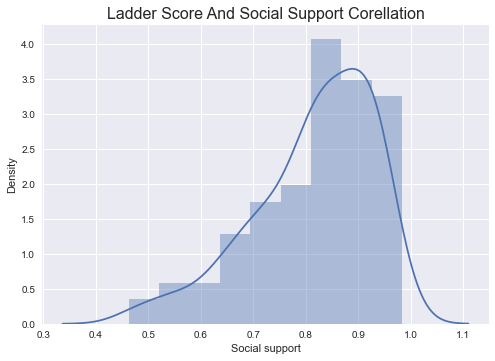

In [25]:
sbn.distplot(dfd['Social support'])
plt.title('Ladder Score And Social Support Corellation', size = 16)
plt.show()

In [26]:
corr_gdp_lfex = []
for i in dfd['Regional indicator'].unique():
    corr_gdp_lfex.append(dfd[dfd['Regional indicator']==i]['Ladder score'].corr(dfd['Social support'],method='pearson'))

dfd_gdp_corr3 = pd.DataFrame({ 
 'Region': dfd['Regional indicator'].unique(),   
'Corellation':  corr_gdp_lfex
}).sort_values('Corellation',ascending = False).reset_index(drop = True)   
dfd_gdp_corr3

,Region,Corellation
0,North America and ANZ,0.961579
1,Southeast Asia,0.850249
2,Western Europe,0.828714
3,South Asia,0.776882
4,Latin America and Caribbean,0.744444
5,Central and Eastern Europe,0.582957
6,Middle East and North Africa,0.531680
7,Commonwealth of Independent States,0.457719
8,East Asia,0.437109
9,Sub-Saharan Africa,0.223755


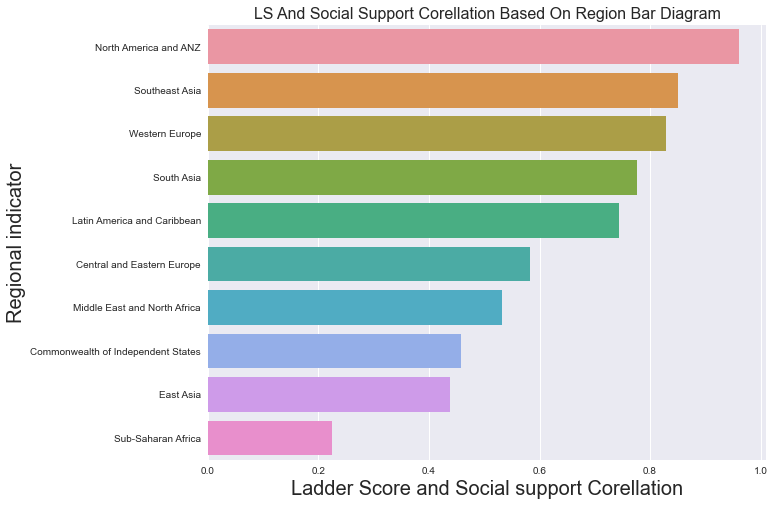

In [27]:
plt.figure(figsize=(10,8))
sbn.barplot(data = dfd_gdp_corr3, x ='Corellation' , y = 'Region')
plt.ylabel('Regional indicator', size = 20)
plt.xlabel('Ladder Score and Social support Corellation', size = 20)
plt.title('LS And Social Support Corellation Based On Region Bar Diagram', size = 16)
plt.show()

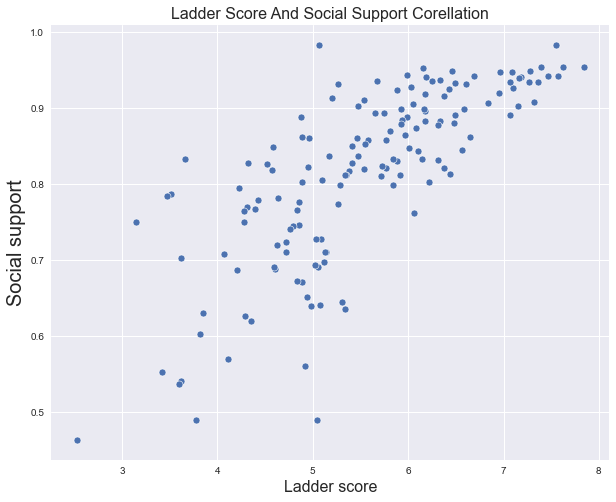

In [28]:
plt.figure( figsize =(10,8))
sbn.scatterplot(data = dfd, x = 'Ladder score', y = 'Social support')
plt.ylabel('Social support', size = 20)
plt.xlabel('Ladder score', size = 16)
plt.title('Ladder Score And Social Support Corellation', size = 16)
plt.show()

As the shown data above almost every region has a high correlation score excluding sub-saharan africa. Knowing that the crime rate in africa is quite high so it's reasonable for sub-saharan africa has a lowest correlation score. Certainly, crime rate is affected by the citizen's social life or humanity. Every people with a high humanity will not drive them to harm each other. The more humanity in people the lower crime rate are. In Southeast Asia are mostly developing country, but has a quite high correlation score. Moreover Southeast Asia has a mid-low crime rate. This signify social life are depends on it's own citizens and also affected by how devout they are. In conclusion social support have a correlation to country's happiness.   

# Corellation Ladder Score Of Region And Generosity

In [29]:
dfd['Ladder score'].corr(dfd['Generosity'], method = 'pearson')

-0.017799276922640765

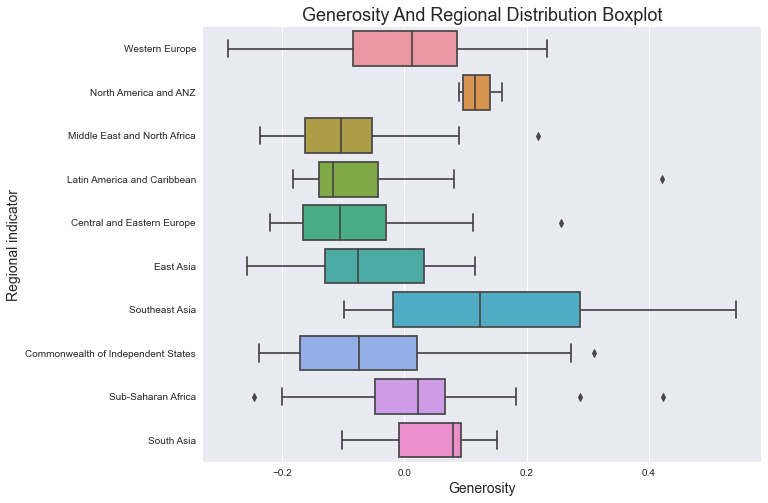

In [30]:
plt.figure(figsize=(10,8))
sbn.boxplot(x=dfd['Generosity'], y=dfd['Regional indicator']) 
plt.title('Generosity And Regional Distribution Boxplot', size = 18)
plt.ylabel('Regional indicator', size = 14)
plt.xlabel('Generosity', size = 14)
plt.show()

In [31]:
from scipy.stats import shapiro
shapiro(dfd['Generosity'])

ShapiroResult(statistic=0.9430261254310608, pvalue=9.616393981559668e-06)

In [32]:
sw_statistic, sw_pvalue = shapiro(dfd['Generosity'])

if sw_pvalue > 0.05:
    print(f'P-Value: {sw_pvalue}). Normal Distribution')
else:
     print(f'P-Value: {sw_pvalue}).Not Normal Distribution')

P-Value: 9.616393981559668e-06).Not Normal Distribution


C:\Users\HILMI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


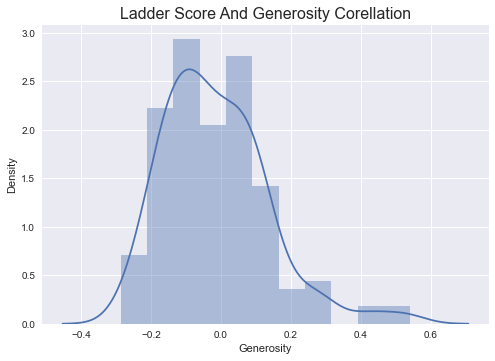

In [33]:
sbn.distplot(dfd['Generosity'])
plt.title('Ladder Score And Generosity Corellation', size = 16)
plt.show()

In [34]:
corr_gdp_lfex = []
for i in dfd['Regional indicator'].unique():
    corr_gdp_lfex.append(dfd[dfd['Regional indicator']==i]['Ladder score'].corr(dfd['Generosity'],method='pearson'))

dfd_gdp_corr4 = pd.DataFrame({ 
 'Region': dfd['Regional indicator'].unique(),   
'Corellation':  corr_gdp_lfex
}).sort_values('Corellation',ascending = False).reset_index(drop = True)   
dfd_gdp_corr4

,Region,Corellation
0,North America and ANZ,0.661898
1,South Asia,0.568690
2,Western Europe,0.524668
3,Middle East and North Africa,0.443936
4,Commonwealth of Independent States,0.344116
5,Sub-Saharan Africa,0.092994
6,East Asia,-0.196884
7,Central and Eastern Europe,-0.276712
8,Southeast Asia,-0.427269
9,Latin America and Caribbean,-0.649260


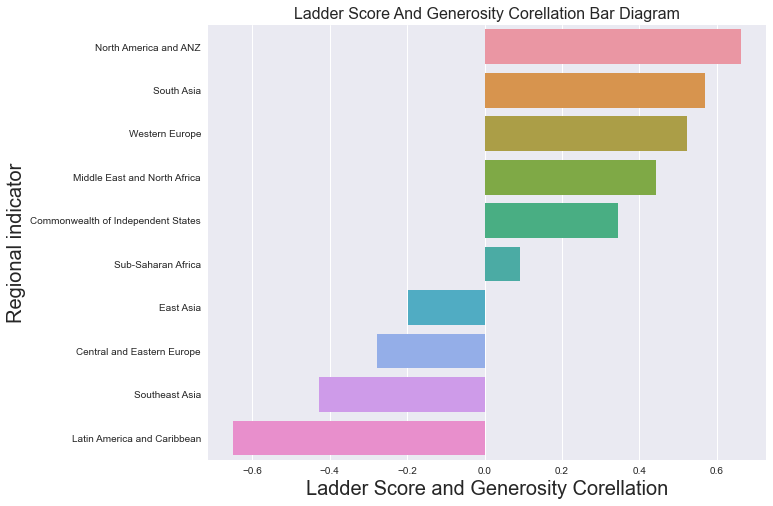

In [35]:
plt.figure(figsize=(10,8))
sbn.barplot(data = dfd_gdp_corr4, x ='Corellation' , y = 'Region',estimator = ny.median)
plt.ylabel('Regional indicator', size = 20)
plt.xlabel('Ladder Score and Generosity Corellation', size = 20)
plt.title('Ladder Score And Generosity Corellation Bar Diagram', size = 16)
plt.show()

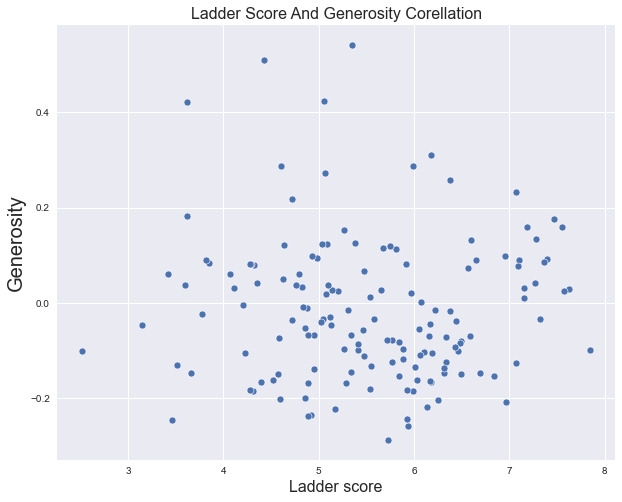

In [36]:
plt.figure( figsize =(10,8))
sbn.scatterplot(data = dfd, x = 'Ladder score', y = 'Generosity')
plt.ylabel('Generosity', size = 20)
plt.xlabel('Ladder score', size = 16)
plt.title('Ladder Score And Generosity Corellation', size = 16)
plt.show()

Almost similar to social support generosity is one of the social value of peaople's virtue. Generally, the willing of giving without expecting any returning favor able to bring prosperity which means affecting happiness. Hence, generosity is connected to the happiness of people.

# Corellation Ladder Score Of Region And Freedom Of Life

In [37]:
dfd['Ladder score'].corr(dfd['Freedom of life'], method = 'pearson')

0.6077530656580246

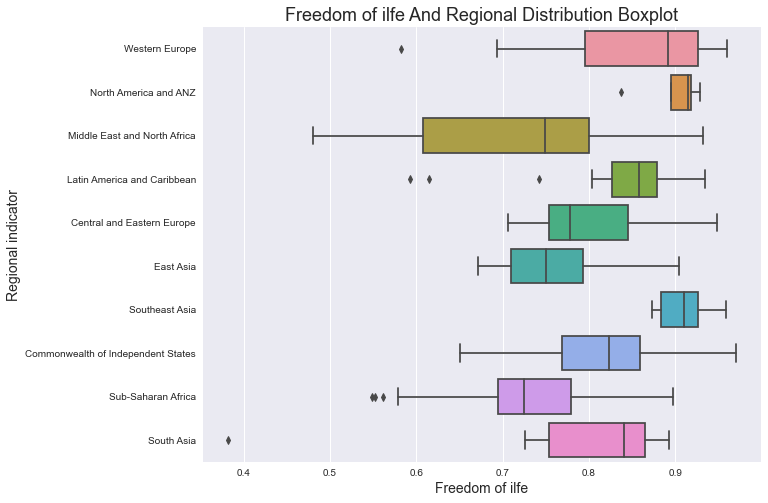

In [38]:
plt.figure(figsize=(10,8))
sbn.boxplot(x=dfd['Freedom of life'], y=dfd['Regional indicator']) 
plt.title('Freedom of ilfe And Regional Distribution Boxplot', size = 18)
plt.ylabel('Regional indicator', size = 14)
plt.xlabel('Freedom of ilfe', size = 14)
plt.show()

In [39]:
from scipy.stats import shapiro
shapiro(dfd['Freedom of life'])

ShapiroResult(statistic=0.9545419216156006, pvalue=8.431809692410752e-05)

In [40]:
sw_statistic, sw_pvalue = shapiro(dfd['Freedom of life'])

if sw_pvalue > 0.05:
    print(f'P-Value: {sw_pvalue}). Normal Distribution')
else:
     print(f'P-Value: {sw_pvalue}).Not Normal Distribution')

P-Value: 8.431809692410752e-05).Not Normal Distribution


C:\Users\HILMI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


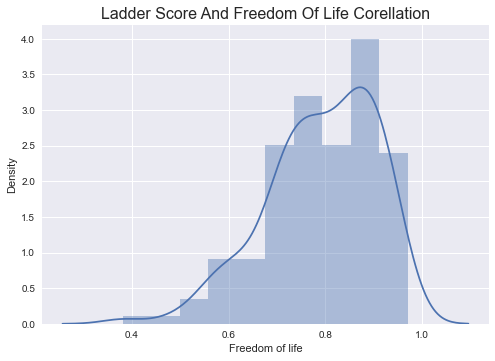

In [41]:
sbn.distplot(dfd['Freedom of life'])
plt.title('Ladder Score And Freedom Of Life Corellation', size = 16)
plt.show()

In [42]:
corr_gdp_lfex = []
for i in dfd['Regional indicator'].unique():
    corr_gdp_lfex.append(dfd[dfd['Regional indicator']==i]['Ladder score'].corr(dfd['Freedom of life'],method='pearson'))

dfd_gdp_corr5 = pd.DataFrame({ 
 'Region': dfd['Regional indicator'].unique(),   
'Corellation':  corr_gdp_lfex
}).sort_values('Corellation',ascending = False).reset_index(drop = True)   
dfd_gdp_corr5

,Region,Corellation
0,North America and ANZ,0.918147
1,Latin America and Caribbean,0.817716
2,Western Europe,0.745248
3,South Asia,0.727344
4,Middle East and North Africa,0.724233
5,Central and Eastern Europe,0.518679
6,Commonwealth of Independent States,0.471475
7,Sub-Saharan Africa,0.112494
8,Southeast Asia,0.087599
9,East Asia,-0.143911


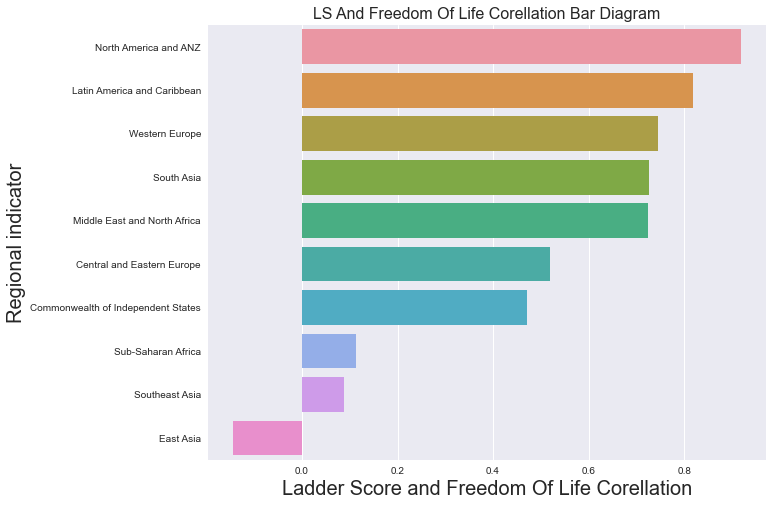

In [43]:
plt.figure(figsize=(10,8))
sbn.barplot(data = dfd_gdp_corr5, x ='Corellation' , y = 'Region')
plt.ylabel('Regional indicator', size = 20)
plt.xlabel('Ladder Score and Freedom Of Life Corellation', size = 20)
plt.title('LS And Freedom Of Life Corellation Bar Diagram', size = 16)
plt.show()

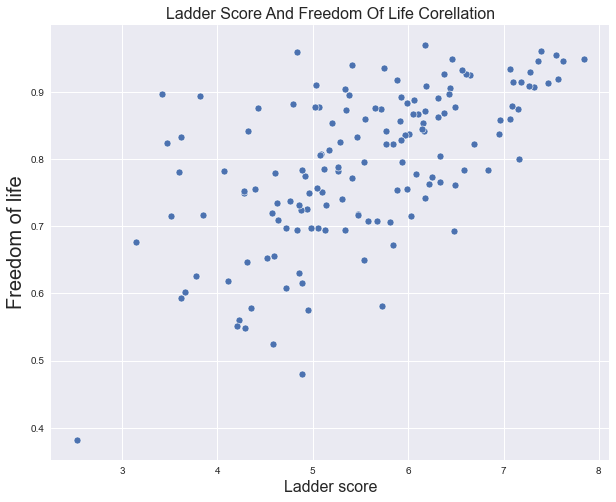

In [44]:
plt.figure( figsize =(10,8))
sbn.scatterplot(data = dfd, y = 'Freedom of life', x = 'Ladder score')
plt.ylabel('Freedom of life', size = 20)
plt.xlabel('Ladder score', size = 16)
plt.title('Ladder Score And Freedom Of Life Corellation', size = 16)
plt.show()

Every country have their own perception of freedom. The most glaring difference is by the religion perception. Some other countries are living in freedom wether to obey their religion or not, but some countries are obeying their religion. Unfortunately, people who devout should have a happiness more than the non-devout because religion ought to encountered their natural tendencies. Unfortunately there are only a few people who are devout and tend to have happiness and also non-devout people that is quite happy. Plus by the data prespective is showing no correlation between freedom of life and happiness.  

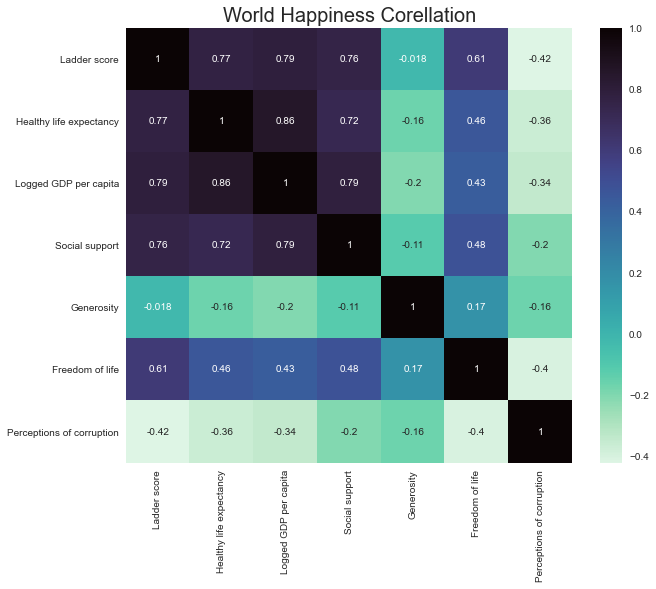

In [45]:
corr_matrix = dfd[['Ladder score','Healthy life expectancy','Logged GDP per capita'
,'Social support','Generosity','Freedom of life','Perceptions of corruption']].corr()

plt.figure(figsize=(10,8))
sbn.heatmap(corr_matrix, cmap ='mako_r',annot =True)
plt.title("World Happiness Corellation", size=20)
plt.show()

From the heat map diagram above, life ladder and the reviewed aspect have a high correlation score above 0.5. But the scatterplot shown non-linear correlation diagram between ladder score and all reviewed aspect. Naturally this two matters are contradictive, the heat map diagram showing the high correltion score that means have a strong connection, but the fact it's not a linear correlation as the shown scatterplot diagram above and of course the ladder score and reviewed aspect has no strong correlation to each other. Also every aspect often generate different result to every region including it's country. In example, finland is declared to be the most happiest country in the world. Unfortunately, Finland was not the country with the highest life expectancy and the other aspect. But the country with the mid-low or mid-high ladder score is the country with the higher or highest life expectancy such as Monaco and Japan. Second is on the gdp gain per capita. Finland also isn't the country with the highest gdp gain per capita but instead Monaco is the country with the highest gdp gain per capita. Just by reviewing this two aspect it draws a conclusion that there has to be a sympson paradox because all of the aspect in the data doesn't affect the happiness of the country which is the correlation is not a cause-effect correlation. Sometimes it affect some country but at the same time it's not affect some country. Overall happiness doesn't related to those aspect, it depends how the country ruling their citizen to gain happiness for their people. In addition happiness are truly depends on it's own people because happiness in only in their own self. 